#### 1. Customers​

a) Plot Customers count by Month and Year​

b) How is the distribution of customers vs countries?​

c) How many one-time buyers  (purchases only once) are there? And how are they distributed by country?​

#### 2. Revenue​

a) What is the Average revenue per quarter for the year 2010?  Plot quarterly revenues for 2010 and 2011.​

b) What are highest sale seasons (months/weeks) in UK?​

c) What are top 5 and least 5 countries by Revenue/ sales quantity? ​

#### 3. Products:​

a) What are top 10 products that were sold and what is a their revenue proportion?​

b) What is the best time to sell top 3 products (from the above list) in UK?​

c) Plot top most returned products across countries? ​

In [1]:
# importing libraries

import os
import json 
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
# create pandas dataframe

retail_df = pd.read_excel('Online_Retail.xlsx')

In [3]:
# visualize 10 rows

retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
# detailed information of the dataset 

retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
retail_df.shape

(541909, 8)

In [6]:
#missing data
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## CUSTOMERS

In [7]:
# Added year and month column

InvoiceDate = retail_df['InvoiceDate']

retail_df['year'] = retail_df['InvoiceDate'].dt.year
retail_df['month'] = retail_df['InvoiceDate'].dt.month


In [8]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12


### 1.(a) Plot Customers count by Month and Year​

<AxesSubplot:title={'center':'Customer Count - Monthly'}, xlabel='month', ylabel='count'>

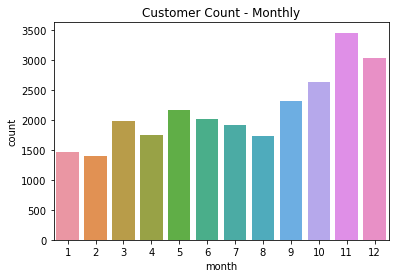

In [12]:
#plot customer count month-wise

plt.title('Customer Count - Monthly')
df_cc =  retail_df[['InvoiceNo','Country','month','year']].groupby('InvoiceNo').first()
sns.countplot(x = 'month',  data = df_cc)

<AxesSubplot:title={'center':'Customer count : Yearly'}, xlabel='year', ylabel='count'>

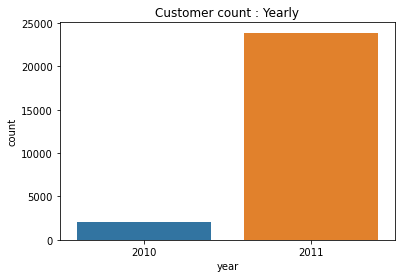

In [13]:
#plot customer count year-wise

plt.title('Customer count : Yearly')
sns.countplot(x = 'year',  data = df_cc)

### 1.(b) How is the distribution of customers vs countries?​

In [23]:
print(retail_df['Country'].unique())
print("\n\tTotal countries:",len( retail_df['Country'].unique()))

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']

	Total countries: 38


<AxesSubplot:title={'center':'Customer Count - Country Wise'}, xlabel='Country', ylabel='count'>

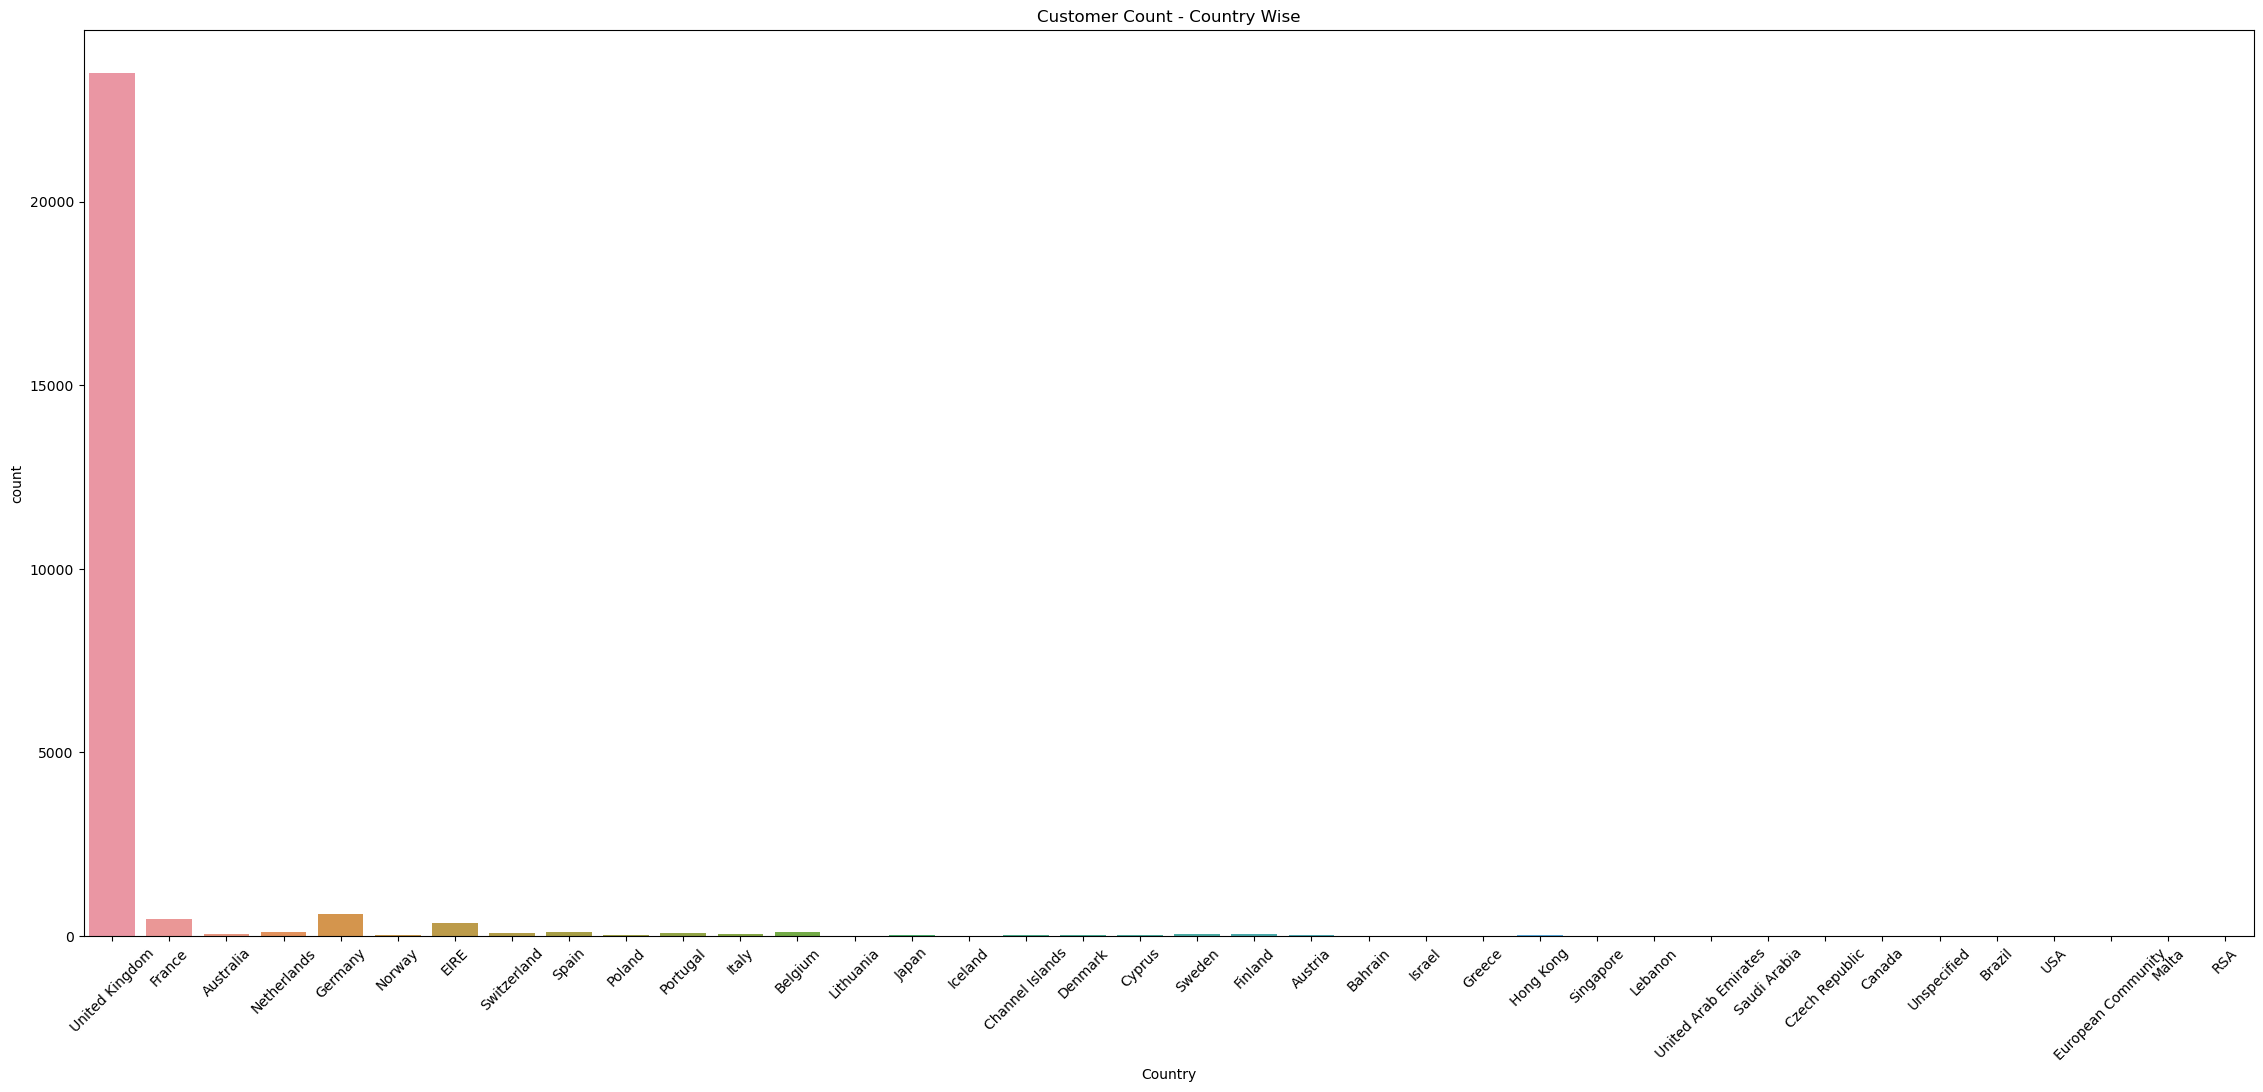

In [24]:
#plot customer vs countries

plt.figure(figsize=(28,12),dpi=100)
plt.xticks(rotation=45)
plt.title('Customer Count - Country Wise')
sns.countplot(x='Country',data=df_cc)

##### 1.(c) How many one-time buyers  (purchases only once) are there? And how are they distributed by country??​

In [53]:
srr = retail_df.groupby('CustomerID')['InvoiceNo'].unique()  # unique InvoiceNo's per customerID
count=0
onet_cid = list()

for cid in srr.index:
    if (len(srr.loc[cid])==1):        # count of customers with one InvoiceNo
        onet_cid.append(cid)
        count+=1
        
print(f"Number of one time buyers are : {count}\n")

dt=dict()

tempdf = retail_df[['CustomerID','Country']].set_index('CustomerID')

for cidd in onet_cid:
    dt[cidd] = tempdf.loc[cidd].iloc[0]      # dictionary of customerID(one time buyeres) and respective Country
    
dts = pd.Series(dt)
dtt = list()

for x in dts.index:
    if isinstance(dts[x],str):
        dtt.append(dts[x])
    else:
        dtt.append(dts[x]['Country'])
        
ltt=list(set(dtt))

print("Distribution of one time buyer (country-wise) are as follows")

data_new = dict()

for x in ltt:
    data_new[x] = dtt.count(x)
    print(x," :\t",dtt.count(x))

Number of one time buyers are : 1313

Distribution of one time buyer (country-wise) are as follows
Austria  :	 4
United Kingdom  :	 1188
Greece  :	 3
USA  :	 1
Portugal  :	 4
Malta  :	 1
Italy  :	 8
Poland  :	 2
France  :	 25
Brazil  :	 1
Channel Islands  :	 3
Israel  :	 2
Belgium  :	 6
Canada  :	 3
Cyprus  :	 3
United Arab Emirates  :	 1
Japan  :	 3
Netherlands  :	 3
Finland  :	 5
Lebanon  :	 1
RSA  :	 1
Switzerland  :	 4
Denmark  :	 1
Sweden  :	 4
Germany  :	 21
Norway  :	 4
Spain  :	 9
Bahrain  :	 2


In [54]:
data_new

{'Austria': 4,
 'United Kingdom': 1188,
 'Greece': 3,
 'USA': 1,
 'Portugal': 4,
 'Malta': 1,
 'Italy': 8,
 'Poland': 2,
 'France': 25,
 'Brazil': 1,
 'Channel Islands': 3,
 'Israel': 2,
 'Belgium': 6,
 'Canada': 3,
 'Cyprus': 3,
 'United Arab Emirates': 1,
 'Japan': 3,
 'Netherlands': 3,
 'Finland': 5,
 'Lebanon': 1,
 'RSA': 1,
 'Switzerland': 4,
 'Denmark': 1,
 'Sweden': 4,
 'Germany': 21,
 'Norway': 4,
 'Spain': 9,
 'Bahrain': 2}

<AxesSubplot:title={'center':'No of onetime buyers - Country Wise'}>

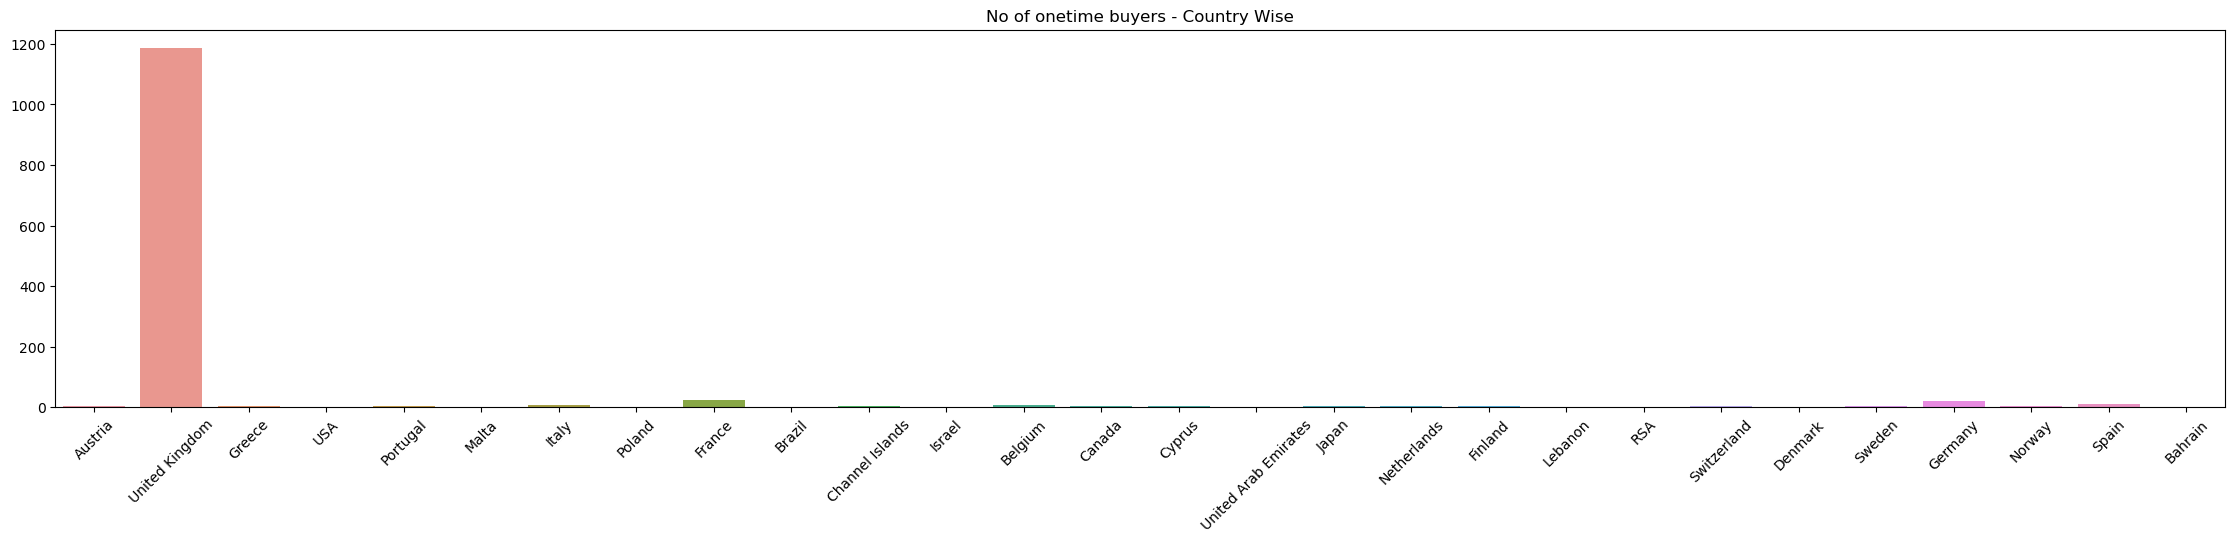

In [55]:
# Plot of one time buyers vs countries

plt.figure(figsize=(28,5),dpi=100)
plt.xticks(rotation=45)

data_new = pd.Series(data=data_new)
plt.title('No of onetime buyers - Country Wise')
sns.barplot(x=data_new.index,y=data_new.values)

## REVENUE

In [51]:
retail_df['total_price']=retail_df['UnitPrice']*retail_df['Quantity']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34


##### 2.(a) What is the Average revenue per quarter for the year 2010?  Plot quarterly revenues for 2010 and 2011​

In [52]:
#average quaterly revenue in the year 2010
(retail_df[retail_df['year']==2010]['total_price'].sum())/4

187239.25499999998

<AxesSubplot:title={'center':'Quaterly Earning for the year 2010 (in millions)'}>

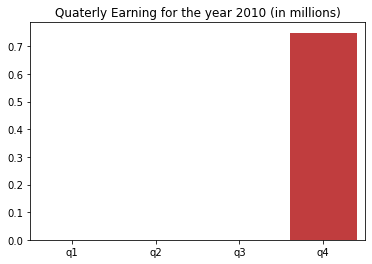

In [16]:
#quaterly revenue for the year : 2010
df_qt_2010 = dict()
df_qt_2010['q1']=retail_df[(retail_df['year']==2010) & (retail_df['month']<=3)]['total_price'].sum()/10**6
df_qt_2010['q2']=retail_df[(retail_df['year']==2010) & (retail_df['month']>3) & (retail_df['month']<=6)]['total_price'].sum()/10**6
df_qt_2010['q3']=retail_df[(retail_df['year']==2010) & (retail_df['month']>6) & (retail_df['month']<=9)]['total_price'].sum()/10**6
df_qt_2010['q4']=retail_df[(retail_df['year']==2010) & (retail_df['month']>9) & (retail_df['month']<=12)]['total_price'].sum()/10**6
df_qt_2010 = pd.Series(data=df_qt_2010)
plt.title('Quaterly Earning for the year 2010 (in millions)')
sns.barplot(x=df_qt_2010.index,y=df_qt_2010.values)

<AxesSubplot:title={'center':'Quaterly Earning for the year 2011 (in millions)'}>

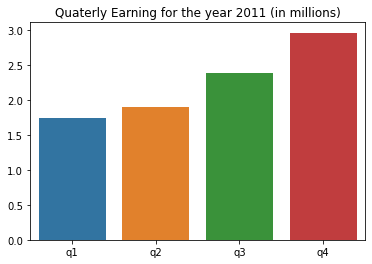

In [17]:
#qualterly revenue for the year : 2011
df_qt_2011 = dict()
df_qt_2011['q1']=retail_df[(retail_df['year']==2011) & (retail_df['month']<=3)]['total_price'].sum()/10**6
df_qt_2011['q2']=retail_df[(retail_df['year']==2011) & (retail_df['month']>3) & (retail_df['month']<=6)]['total_price'].sum()/10**6
df_qt_2011['q3']=retail_df[(retail_df['year']==2011) & (retail_df['month']>6) & (retail_df['month']<=9)]['total_price'].sum()/10**6
df_qt_2011['q4']=retail_df[(retail_df['year']==2011) & (retail_df['month']>9) & (retail_df['month']<=12)]['total_price'].sum()/10**6
df_qt_2011 = pd.Series(data=df_qt_2011)
plt.title('Quaterly Earning for the year 2011 (in millions)')
sns.barplot(x=df_qt_2011.index,y=df_qt_2011.values)

#### 2.(b)What are highest sale seasons (months/weeks) in UK?

In [36]:
#month in which most revenue is generated
df_uk = retail_df[retail_df['Country']=='United Kingdom']
by_month=df_uk.groupby('month').sum()
print(by_month[['total_price']])
max_rev_mon = by_month['total_price'].idxmax()
print(f"Month in which highest revenue was generated in UK is : \t{max_rev_mon}")

       total_price
month             
1       434308.300
2       408247.910
3       559707.390
4       442254.041
5       596459.860
6       554478.350
7       565479.841
8       539130.500
9       862018.152
10      877438.190
11     1282805.780
12     1065478.050
Month in which highest revenue was generated in UK is : 	11


In [19]:
retail_df['week'] = retail_df['InvoiceDate'].dt.isocalendar().week
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,total_price,week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,48


In [38]:
##week of the year in which most revenue is generated
by_week=df_uk.groupby('week').sum()
print(by_week[['total_price']].iloc[:5])
print(".....")
print(by_week[['total_price']].iloc[-5:])
max_rev_week = by_week['total_price'].idxmax()
print(f"Week in which highest revenue was generated UK is : \t{max_rev_week}")

      total_price
week             
1        93720.93
2       190994.96
3       133782.91
4       119136.81
5       123642.18
.....
      total_price
week             
47      308185.02
48      501722.24
49      570892.25
50      207052.17
51       89770.57
Week in which highest revenue was generated UK is : 	49


#### 2.(c) What are top 5 and least 5 countries by Revenue/ sales quantity? ​

In [21]:
#top 5 and bottom 5 revenue generating countries
by_country = retail_df.groupby('Country').sum()
print("Bottom 5:\t", by_country['total_price'].sort_values()[:5])
print("\nTop 5:(revenue in million) \t", by_country['total_price'].sort_values()[-5:]/10**6)

Bottom 5:	 Country
Saudi Arabia       131.17
Bahrain            548.40
Czech Republic     707.72
RSA               1002.31
Brazil            1143.60
Name: total_price, dtype: float64

Top 5:(revenue in million) 	 Country
France            0.197404
Germany           0.221698
EIRE              0.263277
Netherlands       0.284662
United Kingdom    8.187806
Name: total_price, dtype: float64


#### 3.(a) What are top 10 products that were sold and what is a their revenue proportion?​

In [22]:
#products with maximum revenue
by_stock_code = retail_df.groupby('StockCode')
by_stock_code = by_stock_code.sum()
by_stock_code['total_price'].sort_values(ascending=False)[:10]

StockCode
DOT       206245.48
22423     164762.19
47566      98302.98
85123A     97894.50
85099B     92356.03
23084      66756.59
POST       66230.64
22086      63791.94
84879      58959.73
79321      53768.06
Name: total_price, dtype: float64

In [23]:
#percentage of revenue for top 10 products
by_stock_code['total_price'].sort_values(ascending=False)[:10]/(sum(retail_df['total_price']))*100

StockCode
DOT       2.115827
22423     1.690259
47566     1.008469
85123A    1.004278
85099B    0.947460
23084     0.684841
POST      0.679446
22086     0.654427
84879     0.604855
79321     0.551595
Name: total_price, dtype: float64

#### 3.(b) What is the best time to sell top 3 products (from the above list) in UK?•

In [24]:
#products with maximum revenue
by_stock_code_3 = retail_df.groupby('StockCode')
by_stock_code_3_idx = by_stock_code_3.sum().sort_values(by=['total_price'],ascending=False)[:3].index
df_uk = retail_df[retail_df['Country']=='United Kingdom']
df_uk.head()
for stock_code in by_stock_code_3_idx:
    #print(stock_code)
    monthNo=df_uk[df_uk['StockCode']==stock_code].groupby('month').sum()['total_price'].idxmax()
    month = datetime.date(1900, monthNo, 1).strftime('%B')
    print(f"Best time to sell {stock_code} in United Kingdom is : {month}")
    

Best time to sell DOT in United Kingdom is : December
Best time to sell 22423 in United Kingdom is : December
Best time to sell 47566 in United Kingdom is : May


#### 3.(c) Plot top most returned products across countries? ​

In [25]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,total_price,week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30,48
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,48
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00,48
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,48
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,48


United Kingdom        AMAZONFEE
Germany                       M
EIRE                          M
Italy                     22120
France                        M
Australia                 22990
Sweden                   85232B
Portugal                      M
Austria                   22357
Israel                    22474
Belgium                    POST
Bahrain                  72802B
Spain                         M
Japan                     22328
Channel Islands               M
Netherlands               22956
Switzerland               23199
Cyprus                        M
Norway                        M
Saudi Arabia              22361
Hong Kong                     M
Poland                    22796
Finland                    POST
Czech Republic           84459A
Singapore                     M
European Community        22960
Malta                      POST
Greece                     POST
Denmark                   22846
USA                       23158
dtype: object


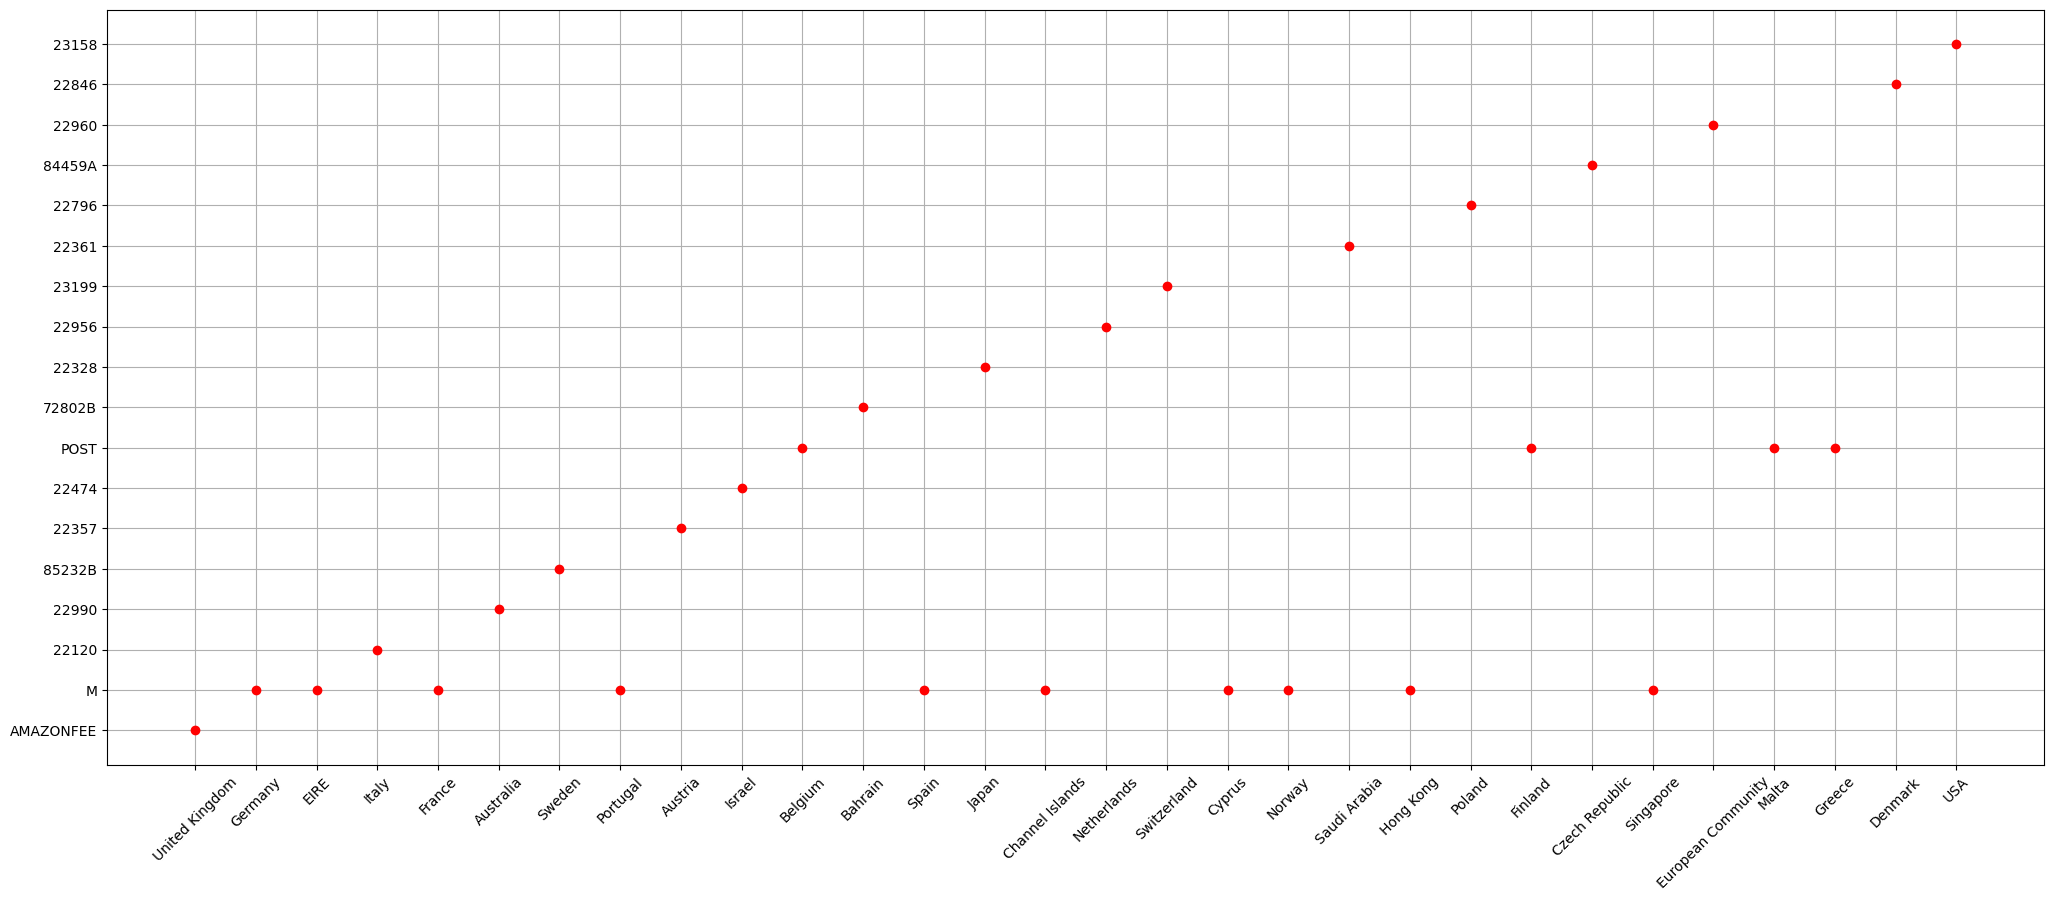

In [41]:
df_return = retail_df[retail_df['total_price']<0]
df_return_grp = df_return.groupby(['Country','StockCode'])['total_price'].sum()
country_list = retail_df[retail_df['total_price']<0]['Country'].unique()
prod_rt_cntry = dict()
for countries in country_list:
    prod_rt_cntry[countries] = df_return_grp.loc[countries].idxmin()
prod_rt_cntry = pd.Series(prod_rt_cntry)
print(prod_rt_cntry)

plt.figure(figsize=(25,10),dpi=100)
plt.xticks(rotation=45)
plt.plot(list(prod_rt_cntry.index),prod_rt_cntry.tolist(),'ro')
plt.grid()
plt.show()